# Vorbereiten der Daten mit RKit

RDKit muss installiert sein.
Vorzugsweise in einem virt. Env. (z.B. my-rdkit-env). Der Prompt zeigt sich dann so:    
`(my-rdkit-env) andreas@hugh:~/Documents/Vorlesung/.../Work $`

Derselbe Workflow muss für die Trainigsdaten und Testdaten durchgeführt werden (hier nur Test, weil dieser kleiner ist):

+ Laden der Rohdaten
+ Beide Daten enthalten einen Datensatz pro Zeile.
+ Extraktion der Spalten mit SMILES und Wirkung
+ Speichern der Wirkung (als log10) in eigener Datei (das wird später y_train bzw. y_test).
+ Berechnen der 2D-Struktur aus den Smiles mit DRkit
+ Berechnen von Deskriptoren mit RDkit
+ Speichern der Deskriptoren in eigener Datei (das wird später x_train bzw. x_test).


## Lesen

mit intelligent:
+ erste Zeile wird übersprungen
+ Zeilen mit Ki = 0 werden übersprungen

In [2]:
import csv
import numpy as np

print(csv.list_dialects())
############ valid data
csvFile =  './TryptaseDataset/valid.csv'
mol = []
with open(csvFile, 'r') as inFile: 
    molReader = csv.reader(inFile, dialect = 'excel-tab')
    
    next(molReader)
    mols = [line for line in molReader if line[2] != '0']
    

mol = mols[0]
len(mols)

['excel', 'excel-tab', 'unix']


997

In [3]:
mol

['3894',
 'C[C@H]1ON=C([C@@H]1C(=O)Nc2ccc(cc2)c3ccccc3S(=O)(=O)N)c4cccc(c4)C(=N)N',
 '4500']

In [4]:
########### train data
train_csvFile = './TryptaseDataset/train.csv'
with open(train_csvFile, 'r') as train_inFile:
    train_molReader = csv.reader(train_inFile, dialect = 'excel-tab')
    next(train_molReader)
    train_mols = [line for line in train_molReader if line[2] != '0']

len(train_mols)

3610

# Alle y-Werte als pKi in einer Datei speichern

mit intelligent:
+ alle Werte auf Molar umrechnen
+ neg. Log, damit es klare Unterschiede gibt (pKi = -logKi)

In [5]:
######### valid data
Ki_nM = [float(x[2]) for x in mols]
Ki = [x*10**-9 for x in Ki_nM] # 1 nM = 10^-9 M
pKi = [-np.log(x) for x in Ki] 

print(Ki_nM[1:5])
print(Ki[1:5])
print(pKi[1:5])

with open('y_test.dat', 'w') as outFile:
    for x in pKi:
        outFile.write(str(x) + '\n')

[22000.0, 4000.0, 17.7, 16000.0]
[2.2000000000000003e-05, 4.000000000000001e-06, 1.77e-08, 1.6000000000000003e-05]
[10.724468104605958, 12.429216196844383, 17.849701197366628, 11.042921835724492]


In [6]:
########## train data
train_Ki_nM = [float(x[2]) for x in train_mols]
train_Ki = [x*10**-9 for x in train_Ki_nM] # 1 nM = 10^-9 M
train_pKi = [-np.log(x) for x in train_Ki]

with open('y_train.dat', 'w') as train_outFile:
    for x in train_pKi:
        train_outFile.write(str(x) + '\n')

In [7]:
train_pKi[:12]

[15.89495209964411,
 12.716898269296165,
 8.111728083308073,
 13.17365667179188,
 10.819778284410283,
 12.53457671250221,
 11.974960924566787,
 13.073573213234896,
 20.89761922409119,
 11.330603908176274,
 9.656627474604601,
 13.05938857824294]

# RDKit testen

### Smiles erkennen:

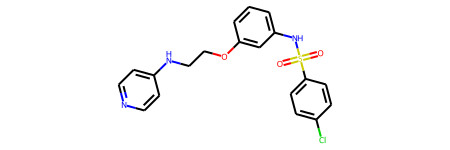

In [19]:
from rdkit import Chem
mol = Chem.MolFromSmiles(mols[500][1])

print(mol)
mol

### Berechnen der 2D-Struktur:

Compute2DCoords() verändert das mol-Objekt direkt - deshalb besser in der objektorientierten Schreibweise verwenden (sonst ist das ein unschöner Seiteneffekt):

In [9]:
from rdkit.Chem import AllChem

# nicht so schön:
# m = AllChem.Compute2DCoords(smi)
mol.Compute2DCoords()

print(Chem.MolToMolBlock(mol))


     RDKit          2D

 27 29  0  0  0  0  0  0  0  0999 V2000
    5.6935   -4.9920    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    5.3114   -3.5415    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8641   -3.1472    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4820   -1.6967    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5471   -0.6405    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.9944   -1.0348    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.3765   -2.4853    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.1650    0.8100    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    5.6155    1.1922    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7145    0.4279    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7828    2.2605    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.3356    2.6548    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9534    4.1053    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5062    4.4996    0

In [25]:
from rdkit.Chem import Draw
Draw.MolToImage(mol)

# geht auch:
Draw.MolToFile(mol,'mol500.png')

### Eigenschaften und Fingerprints:

In [11]:
from rdkit.Chem import Descriptors

print( Descriptors.PEOE_VSA1(mol)) # ... alle bis PEOE_VSA14()
print( Descriptors.Chi0(mol), Descriptors.Kappa1(mol))

print( Descriptors.TPSA(mol), Descriptors.MolLogP(mol))

10.05365155780638
19.114673407305983 19.004447688408163
80.32000000000001 4.026700000000002


In [12]:
from rdkit.Chem import MACCSkeys

fps = MACCSkeys.GenMACCSKeys(mol)
print(fps)

maccs = list(fps)
print(maccs, len(maccs))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0] 167


# Den Datensatz mit RDKit bearbeiten

+ Schön: alle benötigten Eigenschaften aus einer Funktion
+ Anwenden **ohne** Loop
+ speichern in der Datei, mit der später das neuronale Netz trainiert werden soll

In [13]:
def mkDescriptors(m):
    
    m.Compute2DCoords()
    fps = MACCSkeys.GenMACCSKeys(m)
    maccs = list(fps)
    desc = maccs
    desc.append(Descriptors.PEOE_VSA1(m))
    desc.append(Descriptors.PEOE_VSA2(m))
    # ... natürlich alle PEOEs
    # ... und Chi0, Kappa1, MolLogP
    desc.append(Descriptors.PEOE_VSA3(m))
    desc.append(Descriptors.PEOE_VSA4(m))
    desc.append(Descriptors.PEOE_VSA5(m))
    desc.append(Descriptors.PEOE_VSA6(m))
    desc.append(Descriptors.PEOE_VSA7(m))
    desc.append(Descriptors.PEOE_VSA8(m))
    desc.append(Descriptors.PEOE_VSA9(m))
    desc.append(Descriptors.PEOE_VSA10(m))
    desc.append(Descriptors.PEOE_VSA11(m))
    desc.append(Descriptors.PEOE_VSA12(m))
    desc.append(Descriptors.PEOE_VSA13(m))
    desc.append(Descriptors.PEOE_VSA14(m))
    
    desc.append(Descriptors.Chi0(m))
    desc.append(Descriptors.Kappa1(m))
    desc.append(Descriptors.MolLogP(m))
    
    return desc
    
print(mkDescriptors(mol))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 10.05365155780638, 9.706073385399296, 8.417796984328938, 0.0, 0.0, 17.667306958694127, 48.53093654769288, 35.714830206025226, 10.582869750201336, 12.356393797796823, 0.0, 0.0, 10.023291153407584, 0.0, 19.114673407305983, 19.004447688408163, 4.026700000000002]


In [14]:
######### valid data
allMols = [Chem.MolFromSmiles(smi[1]) for smi in mols]
allDesc = [mkDescriptors(mol) for mol in allMols]

In [26]:
Draw.MolToFile(allMols[1],'mol1.png')

In [14]:
with open('x_test.dat', 'w') as outFile:
    for desc in allDesc: 
        for i in range(len(desc)): 
            if i != len(desc)-1: outFile.write(str(desc[i]) + ',')
            else: outFile.write(str(desc[i]))
        outFile.write('\n')

In [15]:
print(allDesc[100:101])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 37.05447345099389, 28.96509065299478, 0.0, 0.0, 0.0, 49.59430021108608, 31.246737983401033, 46.00653162779328, 12.145807216896262, 12.083681658295921, 5.959554568743835, 23.504784134419456, 5.907179729351506, 0.0, 31.191659197566096, 33.50148720999405, -0.09229999999999416]]


In [16]:
######## train data
train_allMols = [Chem.MolFromSmiles(smi[1]) for smi in train_mols]
train_allDesc = [mkDescriptors(mol) for mol in train_allMols]

In [17]:
with open('x_train.dat', 'w') as train_outFile:
    
    for desc in train_allDesc: 
        for i in range(len(desc)): 
            if i != len(desc)-1: 
                
                train_outFile.write(str(desc[i]) + ',')
            else: 
                train_outFile.write(str(desc[i]))
        train_outFile.write('\n')